<a href="https://colab.research.google.com/github/MONAlIS-A/ANN/blob/main/xavier_initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv')

In [3]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


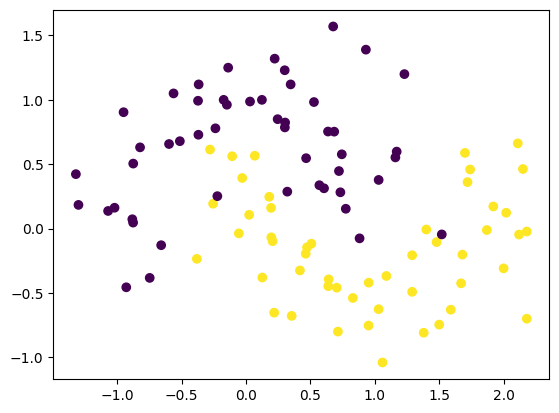

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [17]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Set parameters to 0
model.get_weights()

[array([[ 0.42391723,  0.5041508 , -0.09666938,  0.06401771,  0.28095812,
          0.3277642 ,  0.6467002 ,  0.50742596,  0.12497079,  0.06771344],
        [-0.47093034, -0.33772135,  0.5921814 , -0.18215698,  0.5662778 ,
          0.6138807 ,  0.22674972,  0.33860606,  0.44979483,  0.6741548 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-2.2273821e-01, -4.1475683e-01,  2.8630024e-01,  3.5908133e-01,
          4.9395299e-01, -7.4636996e-02,  2.7411580e-02,  8.7752283e-02,
          2.4034661e-01, -3.6628664e-02],
        [ 3.2455003e-01, -2.0040089e-01, -1.2089896e-01,  1.2905937e-01,
          2.4458808e-01, -4.2884001e-01, -1.8953496e-01,  4.5721447e-01,
         -2.6653653e-01,  1.5892076e-01],
        [-1.1470261e-01, -5.1894104e-01,  2.9599816e-01,  1.8553066e-01,
         -4.4546950e-01,  4.8870409e-01,  1.3178003e-01,  4.3297935e-01,
          1.4823675e-04, -2.2830984e-01],
        [ 3.9007872e-01,  3.6868602e-01,  3.39907

In [19]:
initial_weights = model.get_weights()

In [20]:
initial_weights[0] = np.random.randn(2, 10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10, 10)*np.sqrt(1/2)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10, 10)*np.sqrt(1/2)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6]  =np.random.randn(10, 10)*np.sqrt(1/2)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] =np.random.randn(10, 1)*np.sqrt(1/2)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [21]:
model.set_weights(initial_weights)

In [22]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
model.get_weights()

[array([[-0.47040698, -0.8542111 ,  0.41781613,  0.14712015,  1.144379  ,
         -0.13219263, -0.15069477, -1.016538  , -0.429951  , -0.26762977],
        [ 0.5319039 ,  0.39909604, -0.1499555 ,  0.17734376,  0.48054054,
         -0.22070047,  0.53722876,  0.6018129 ,  0.7095377 , -1.3319755 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.13151707,  0.123275  ,  0.49085236, -0.74331653,  0.03094612,
          1.4744202 ,  0.3051254 , -0.55405706, -1.2446575 ,  0.05460178],
        [-0.03557639, -1.1230274 , -0.9251659 ,  0.48240134,  0.98890424,
         -0.10370827, -0.20296676, -0.33729595, -1.632998  , -0.6658721 ],
        [-0.00526134,  0.60421467,  0.73888135, -0.24900043, -0.00388437,
         -0.07026742,  0.3026219 ,  0.8851722 , -0.5752089 , -1.0938264 ],
        [-0.8771208 ,  0.04378299, -0.35819304,  0.4353232 , -0.49850738,
         -0.21399164,  0.4604064 , -0.1038463 , -0.5536308 ,  0.58248323],
        [-0.29488

In [24]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.7781 - loss: 0.5061 - val_accuracy: 0.8500 - val_loss: 0.3912
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7883 - loss: 0.4695 - val_accuracy: 0.8500 - val_loss: 0.3777
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8109 - loss: 0.4787 - val_accuracy: 0.8500 - val_loss: 0.3654
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8562 - loss: 0.4266 - val_accuracy: 0.8500 - val_loss: 0.3536
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8562 - loss: 0.4207 - val_accuracy: 0.8500 - val_loss: 0.3438
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8703 - loss: 0.4069 - val_accuracy: 0.8500 - val_loss: 0.3345
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8625 - loss: 0.4153 - val_accuracy: 0.9000 - val_loss: 0.3262
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8211 - loss: 0.4332 - val_accuracy: 0.8500 - val_loss

In [25]:
model.get_weights()

[array([[-0.4324835 , -0.78928703,  0.4925217 ,  0.16544148,  1.1583462 ,
         -0.18851936, -0.12486832, -0.8876417 , -0.47639555, -0.37293404],
        [ 0.65113115,  0.25262105, -0.01965065,  0.0476778 ,  0.50919205,
         -0.34050804,  0.69431484,  0.5916353 ,  0.67989665, -1.4009598 ]],
       dtype=float32),
 array([-0.17329133,  0.1344716 ,  0.02280987, -0.01027881,  0.09181587,
        -0.02863254, -0.11329824,  0.07381853,  0.03064068, -0.13621904],
       dtype=float32),
 array([[ 0.27151167,  0.38309202,  0.71632594, -0.781272  ,  0.04016136,
          1.3632221 ,  0.29809305, -0.5921664 , -1.1551408 ,  0.16589637],
        [-0.00998627, -0.93253094, -0.8821257 ,  0.47614473,  0.99847394,
         -0.15956014, -0.21575679, -0.40746057, -1.4549108 , -0.642671  ],
        [-0.0478101 ,  0.45430577,  0.7238343 , -0.22725335, -0.037177  ,
          0.00479069,  0.3008314 ,  0.94235915, -0.70447123, -1.1509959 ],
        [-0.83651984,  0.04043744, -0.23697726,  0.45127654, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

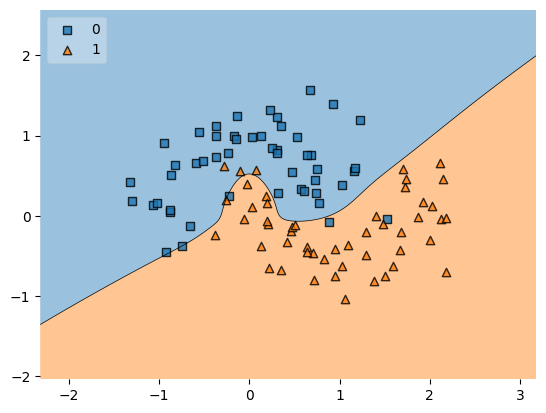

In [26]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)